<a href="https://colab.research.google.com/github/MahdiZakipour/from-Colaboratory/blob/main/A_Z_Machine_Learning_9_Bonus_2_Template_Deep_Learning_for_Regression_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# worked
# show working directory
import os
#os.getcwd()
os.chdir('D:\Learning\Deep Learning A-Z course - my files\Section 8 Deep Learning\Deep Learning for Droplet D by  Comsol')
os.getcwd()


'D:\\Learning\\Deep Learning A-Z course - my files\\Section 8 Deep Learning\\Deep Learning for Droplet D by  Comsol'

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import vpython as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('D:/Learning/Deep Learning A-Z course - my files/Section 8 Deep Learning/Deep Learning for Droplet D by  Comsol/NAMED_housing.csv')
prices = data['medv'] # This is our target to predict (Y)  
features = data.drop('medv', axis = 1) # Our initially, features


# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

data.head()

<IPython.core.display.Javascript object>

Boston housing dataset has 506 data points with 15 variables each.


Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio       b  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2

In [ ]:
# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $5.0
Maximum price: $50.0
Mean price: $22.532806324110677
Median price $21.2
Standard deviation of prices: $9.188011545278203


D:\Softwares\AnacondaSetUp\envs\Mahdi\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


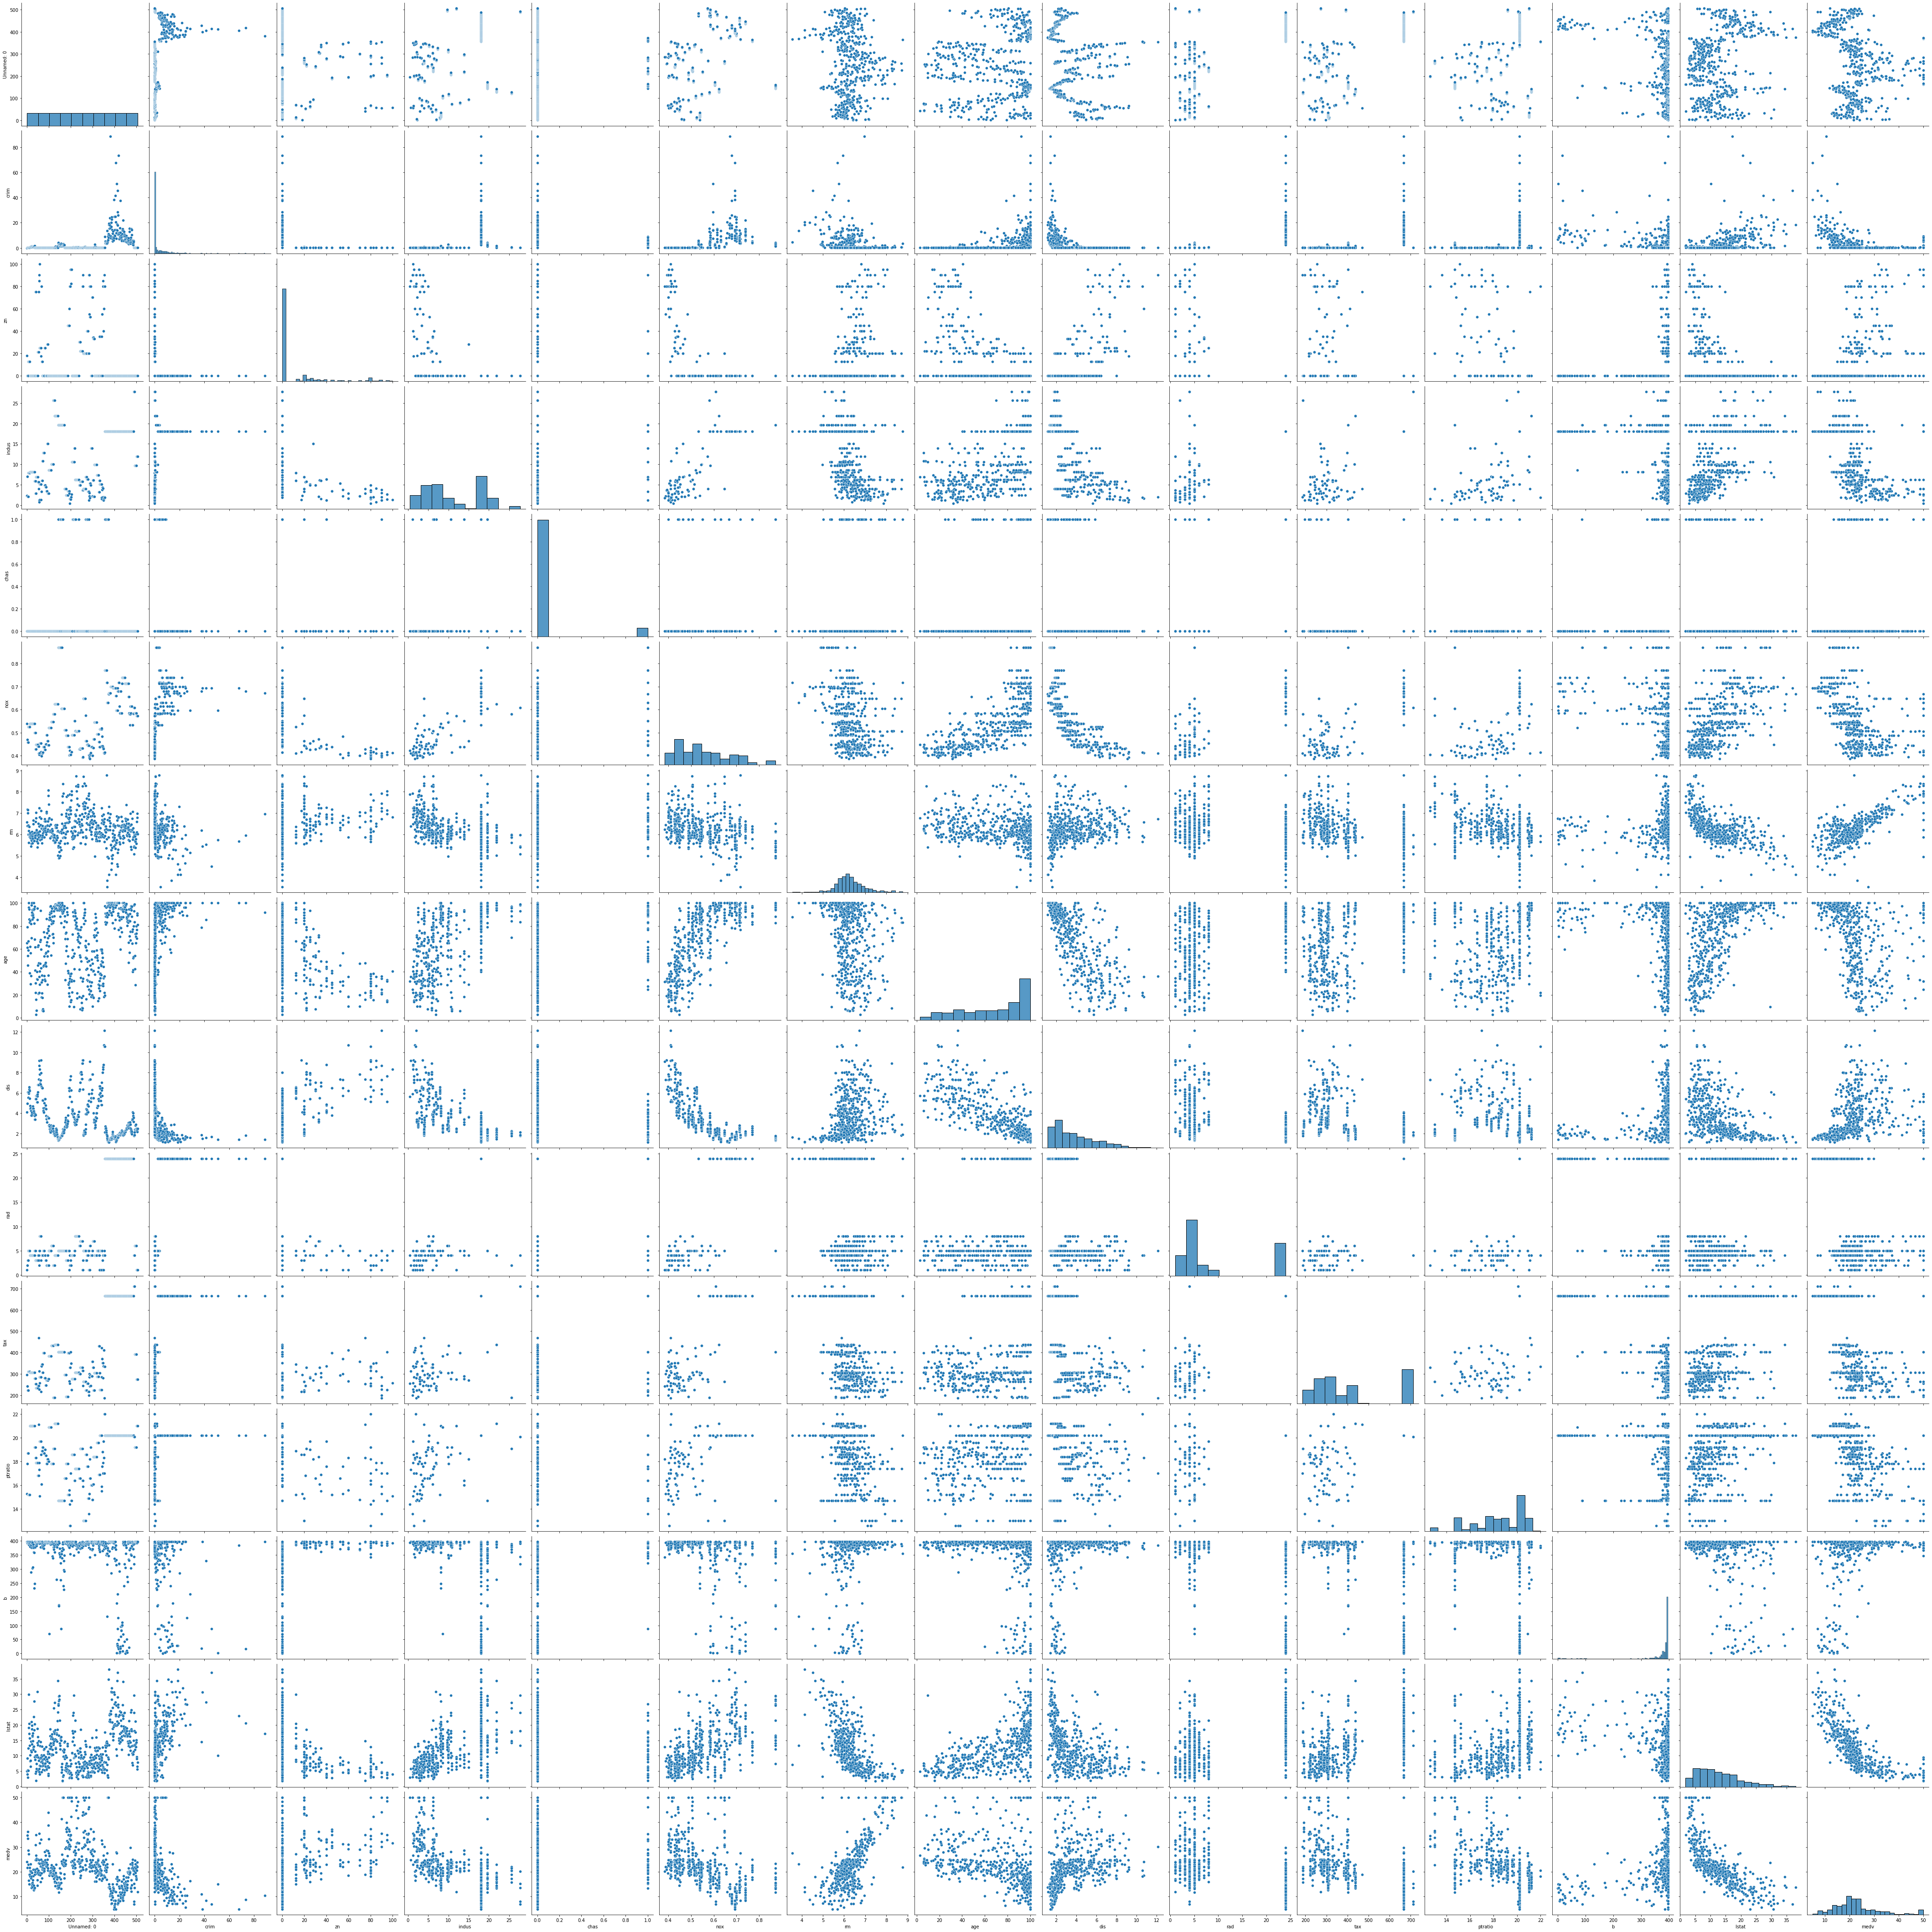

In [ ]:
### Feature Observation
# making some Assumptions for our Data, We’ll find out if these assumptions are correct through the project.

### Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns # for making statistical graphics
#                       Plot pairwise relationships in a dataset; Histograms and Scatters TOGATHER :)

%matplotlib inline

# Calculate and show pairplot
sns.pairplot(data, size=4)
#plt.tight_layout()

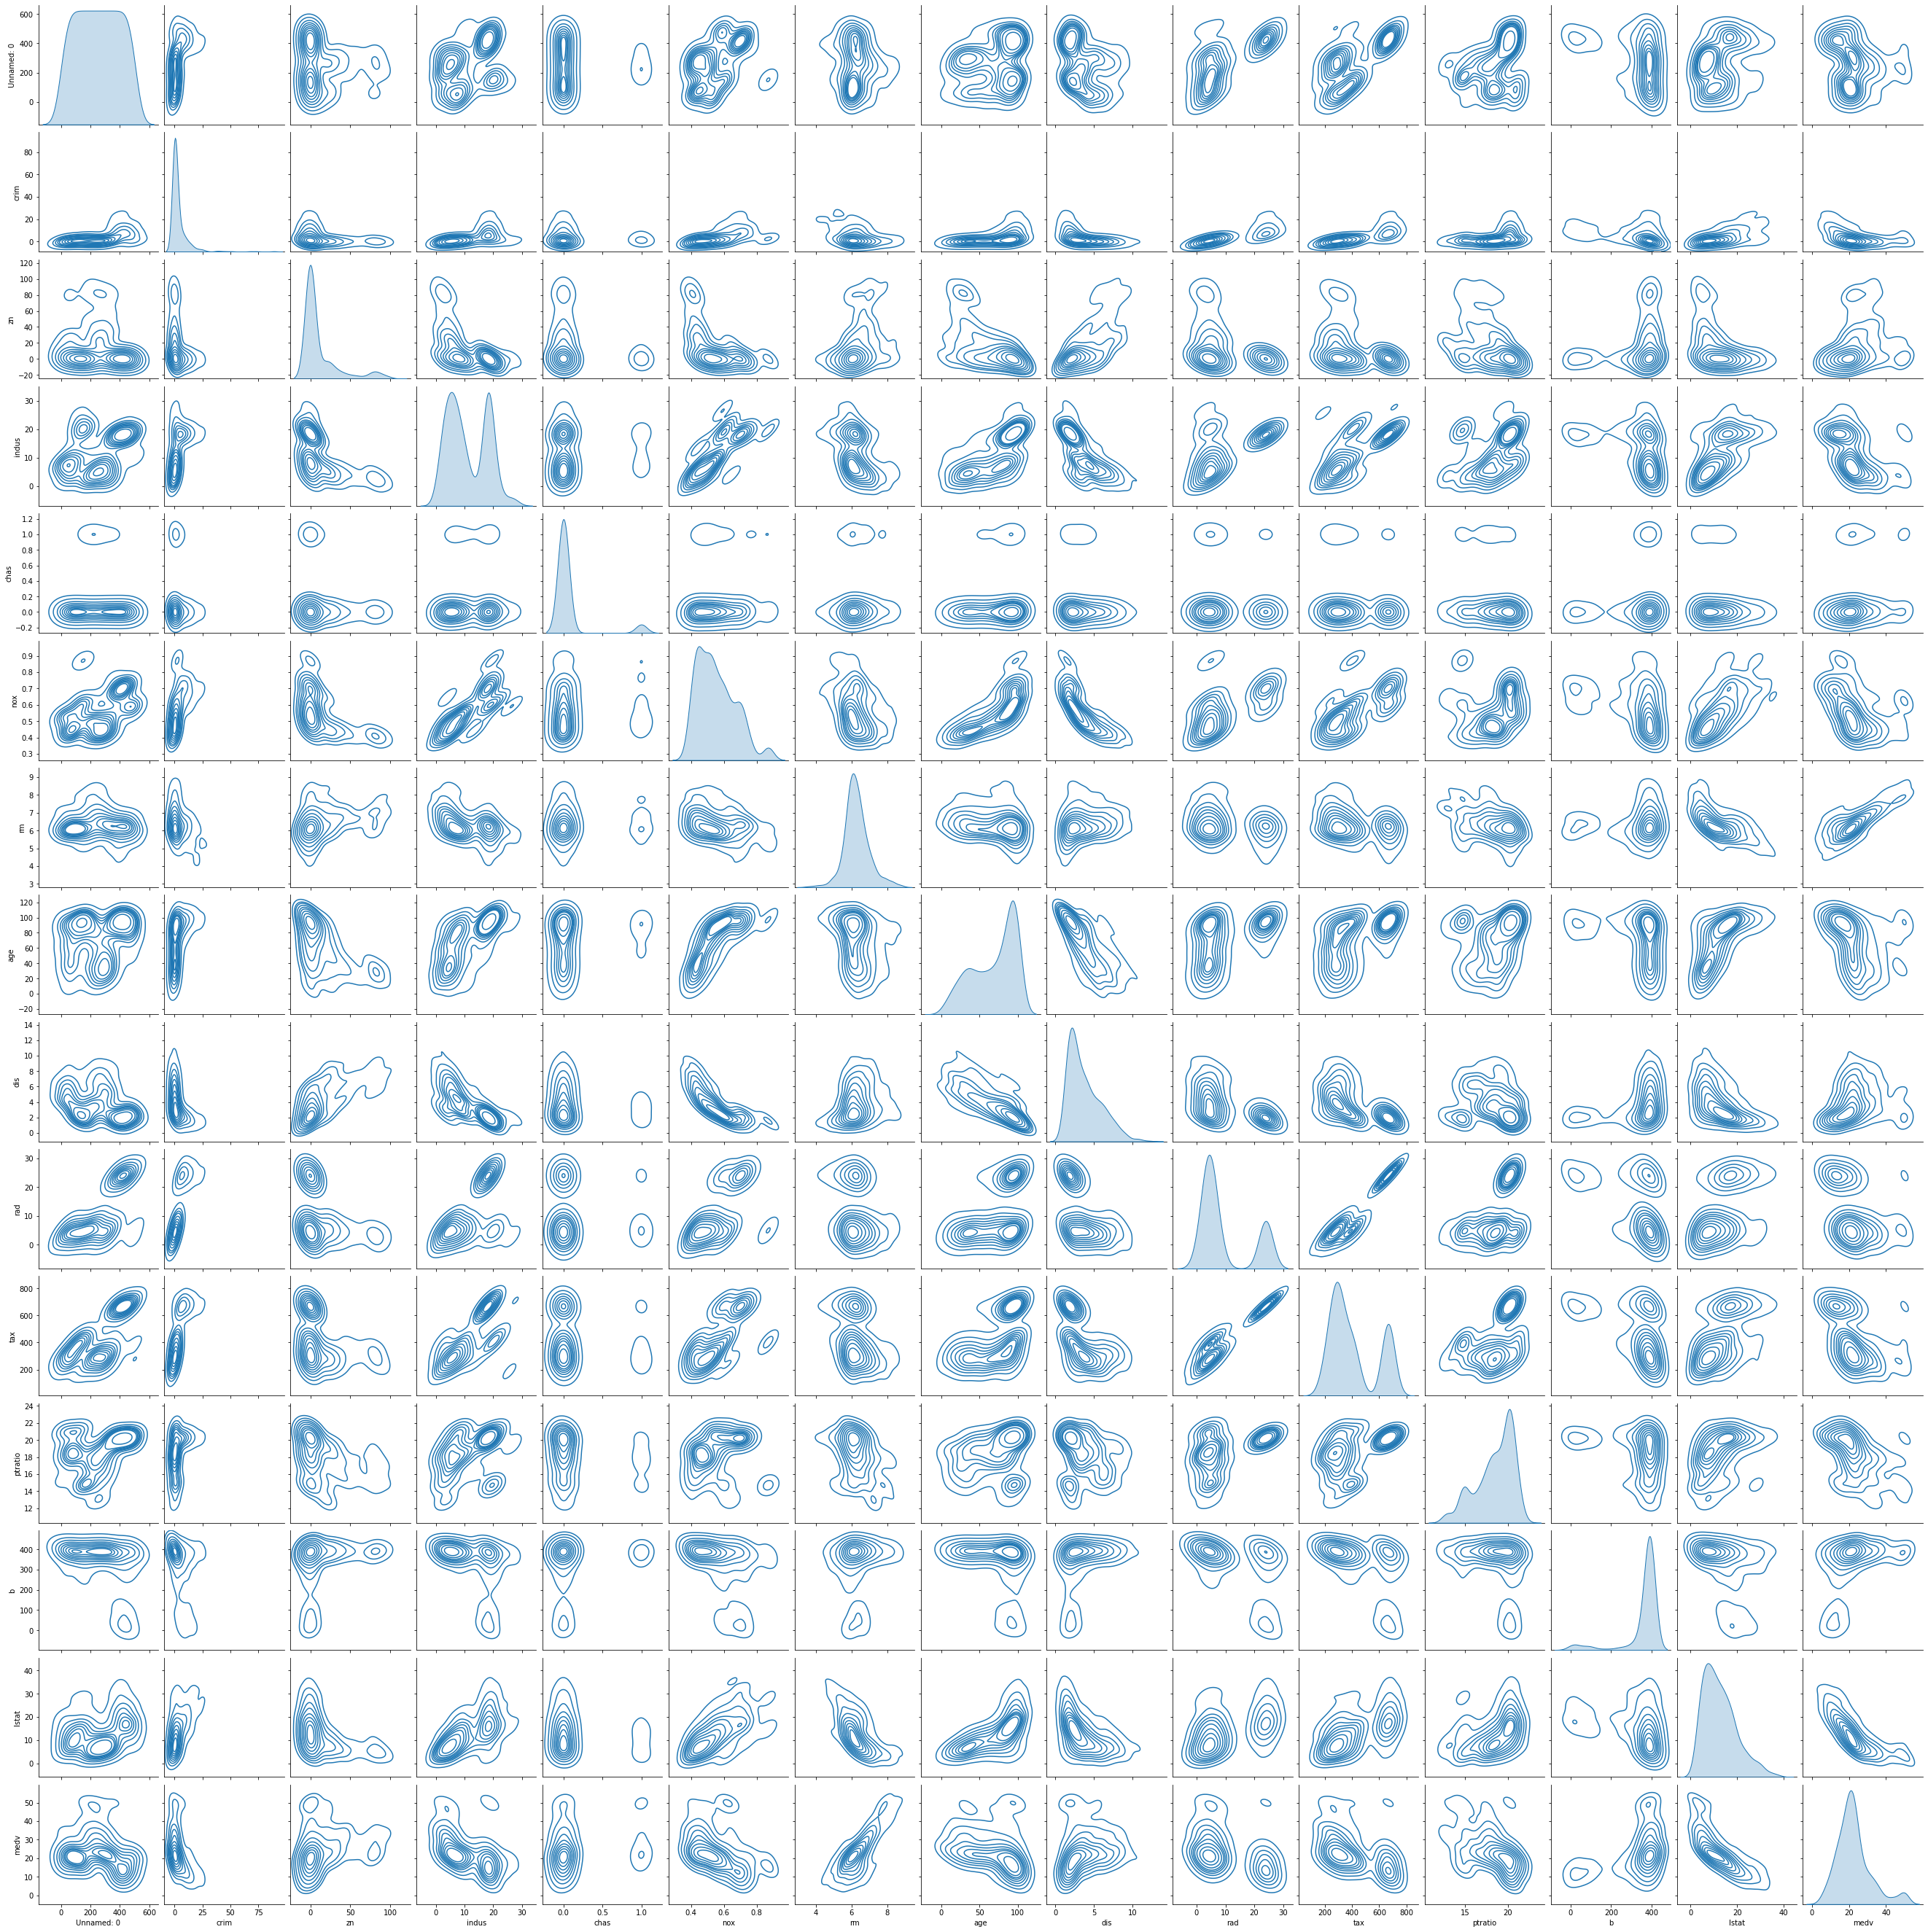

In [ ]:
%matplotlib inline

# Calculate and show pairplot
sns.pairplot(data, kind = 'kde')

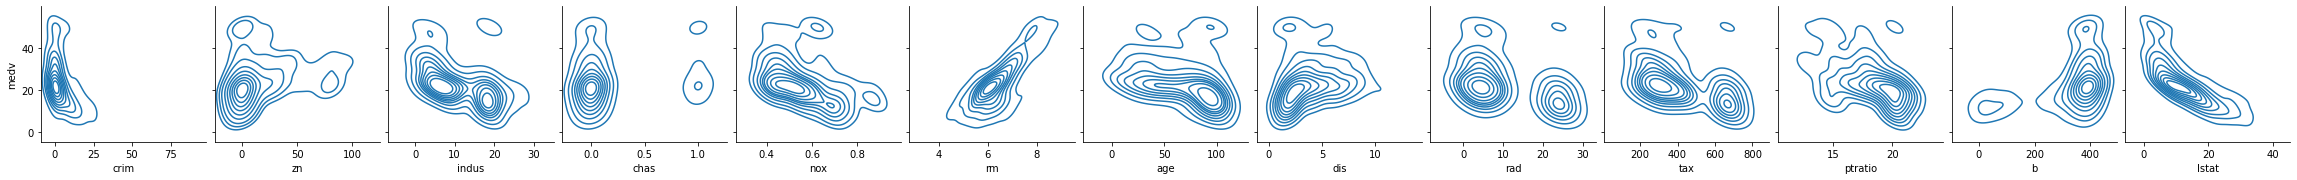

In [ ]:
%matplotlib inline

# Calculate and show pairplot
sns.pairplot(data, kind = 'kde',
             x_vars = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat' ],
             y_vars = ['medv'])

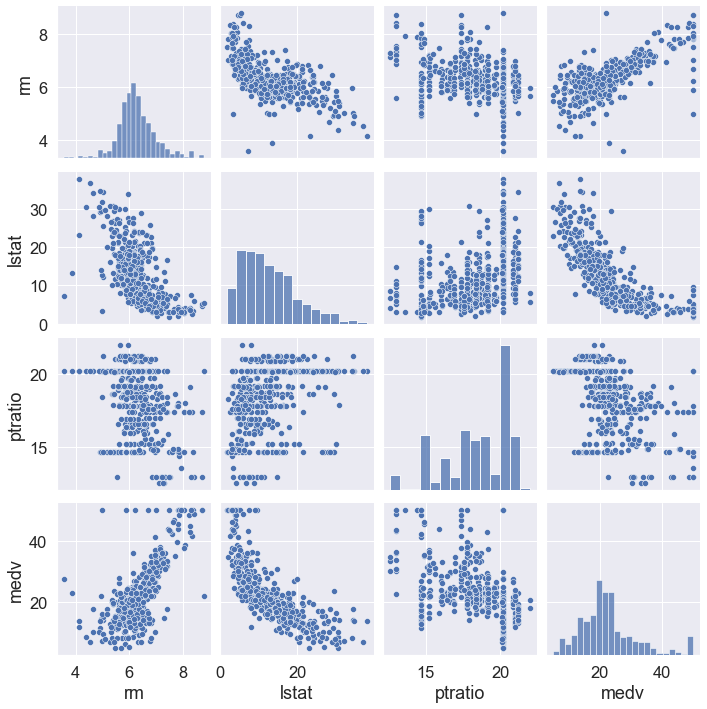

In [ ]:
# slice our data into new_data 
data_new = data.loc[:, ['rm', 'lstat', 'ptratio', 'medv']]
features_new = data_new.drop('medv', axis = 1) # Our initially, features

%matplotlib inline

# Calculate and show pairplot
sns.pairplot(data_new)

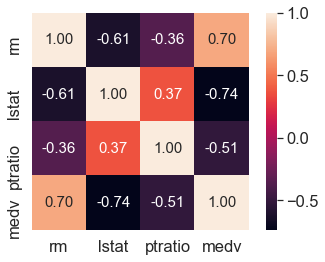

In [ ]:
# Calculate and show correlation matrix
cm = np.corrcoef(data_new.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=['rm', 'lstat', 'ptratio', 'medv'],
                xticklabels=['rm', 'lstat', 'ptratio', 'medv'])

In [ ]:
### Develop the Model
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features_new, prices, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [ ]:
# Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [ ]:
# Produce learning curves for varying training set sizes and maximum depths
# this part doesn't work :(((
import visuals as vs

#vs.ModelLearning(features_new, prices)
#vs.ModelComplexity(X_train, y_train)


In [ ]:
### Make the Model
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [ ]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [ ]:
### 3 - Make Predictions
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $19.39
Predicted selling price for Client 2's home: $10.76
Predicted selling price for Client 3's home: $46.60


In [ ]:
# Model Sensitivity
#vs.PredictTrials(features, prices, fit_model, client_data)

AttributeError: module 'visuals' has no attribute 'PredictTrials'